<a href="https://colab.research.google.com/github/wafer110/Python-DataMining-MachineLearning/blob/master/HW1_Part1_WeiHuaHsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Packages

In [22]:
import pandas as pd
import numpy as np
import math # g-mean
import matplotlib.pylab as plt
from google.colab import files # save plots
# plt.tight_layout()
# plt.savefig('graph_name.png')
# files.download('graph_name.png')
import warnings; warnings.filterwarnings("ignore")
# Machine Learning Algorithms
from sklearn.model_selection import train_test_split # Split to train/test data
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.neural_network import MLPClassifier # Multi-Layer Perceptrons
from sklearn.model_selection import cross_val_score # Accuracy & AUC score
from sklearn.feature_selection import SelectKBest # Univariate F-test FS
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier # Tree-based Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE #SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

## Read Datasets

In [2]:
ozone_url = 'https://raw.githubusercontent.com/wafer110/Python-DataMining-MachineLearning/master/HW1/ozone-level.csv'
ozone = pd.read_csv(ozone_url)

steel_url = 'https://raw.githubusercontent.com/wafer110/Python-DataMining-MachineLearning/master/HW1/steel-plates.csv'
steel = pd.read_csv(steel_url)

### Data Manipulation - steel-plates  
Get the subset data for both multi-class & binary class problem.

  - Multi-Class: Set class as 7 types of faults   
    1 = Pastry;     
    2 = Z_Scratch;   
    3 = K_Scatch;  
    4 = Stains;  
    5 = Dirtiness;  
    6 = Bumps;  
    7 = Other_Faults

In [3]:
# replace the class entries 1 as different class 1-7
steel['V29'] = steel['V29'].replace([1], 2)
steel['V30'] = steel['V30'].replace([1], 3)
steel['V31'] = steel['V31'].replace([1], 4)
steel['V32'] = steel['V32'].replace([1], 5)
steel['V33'] = steel['V33'].replace([1], 6)
steel['V34'] = steel['Class'].replace([1,2], [0,7])
# create a new column 'multi-class'
steel['multi_class'] = steel['V28']
# store multi-class variables into the new column
steel['multi_class'][158:348]   = 2
steel['multi_class'][348:739]   = 3
steel['multi_class'][739:811]   = 4
steel['multi_class'][811:866]   = 5
steel['multi_class'][866:1268]  = 6
steel['multi_class'][1268:1941] = 7

# save to a new subset: 'steel_mul'
steel_data = steel.iloc[:, 0:27]
steel_mul = pd.concat([steel_data, steel.multi_class], axis = 1)

  - Binary Class: Set class as a binary problem  
    1 = Common; 
    2 = Other Fault

In [4]:
# save to a new subset: 'steel_bin'
steel_bin = pd.concat([steel_data, steel.Class], axis = 1)

# Part I

1. At which points (in terms of training set-size and classifier) do we observe overfitting in each data set?  
2. Can overfitting be overcome by feature selection?  
3. Are either of your datasets imbalanced? Select the most imbalanced one and show the results obtained using the following four methods on the full data set:  
    - Do nothing  
    - Randomly oversample the minority class  
    - Randomly undersample the minority class  
    - Use SMOTE to oversample the minority class.  

## 1) At which points (in terms of training set-size and classifier) do we observe overfitting in each data set?

### 1-1 ozone data

#### 1-1.1 Decision Tree

Text(0, 0.5, 'AUC Score')

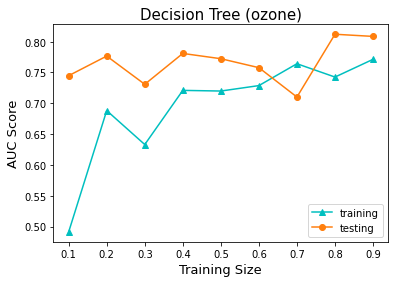

In [ ]:
# Get Features & Target variables
features_columns = ozone.columns[:-1] # exclude 'Class'
X = ozone[features_columns] # Features
y = ozone['Class'] # Target

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
DT_AUC_train = []
DT_AUC_test = []
DT_AUC_train_std = []
DT_AUC_test_std = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit DecisionTree 
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  train_scores_std = cross_val_score(clf, X_train, y_train, cv = 10, 
                                     scoring = 'roc_auc').std()
  test_scores_std = cross_val_score(clf, X_test, y_test, cv = 10, 
                                    scoring = 'roc_auc').std()
  DT_AUC_train.append(train_scores)
  DT_AUC_test.append(test_scores)
  DT_AUC_train_std.append(train_scores_std)
  DT_AUC_test_std.append(test_scores_std)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Decision Tree (ozone)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

In [ ]:
DT_AUC_train; DT_AUC_test
DT_AUC_train_std; DT_AUC_test_std

[0.07435097566210773,
 0.05153887852094868,
 0.06987662090455413,
 0.06525107395596637,
 0.0921246542401864,
 0.123302947111215,
 0.12793555172447169,
 0.08562583116557351,
 0.11057205311934903]

In [ ]:
# confidence interval 
print("Training_AUC_CI: %0.2f (+/- %0.2f)" % (DT_AUC_train, DT_AUC_train_std * 2))
print("Testing_AUC_CI: %0.2f (+/- %0.2f)" % (DT_AUC_test, DT_AUC_test_std * 2))

DT_AUC_train + DT_AUC_train_std * 2
DT_AUC_train - DT_AUC_train_std * 2


TypeError: ignored

#### 1-1.2 Multi-Layer Perceptrons


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

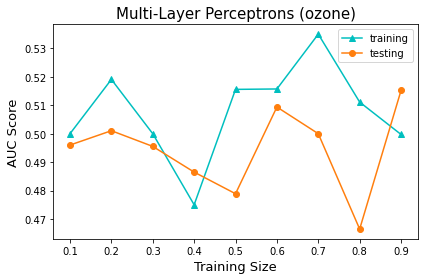

In [ ]:
# Get Features & Target variables
features_columns = ozone.columns[:-1] # exclude 'Class'
X = ozone[features_columns] # Features
y = ozone['Class'] # Target

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
MLP_AUC_train = []
MLP_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit Multi-Layer Perceptrons 
  clf = MLPClassifier(activation = 'logistic', 
                    solver = 'adam',
                    alpha = 1e-5,
                    max_iter = 1000,  
                    hidden_layer_sizes = (15, 10),
                    random_state = 1,
                    learning_rate_init = 0.5)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  MLP_AUC_train.append(train_scores)
  MLP_AUC_test.append(test_scores)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(training_sizes, MLP_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, MLP_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom left')
plt.title('Multi-Layer Perceptrons (ozone)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

### 1-2 steel plates data 

#### 1-2.1 Decision Tree (binary)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

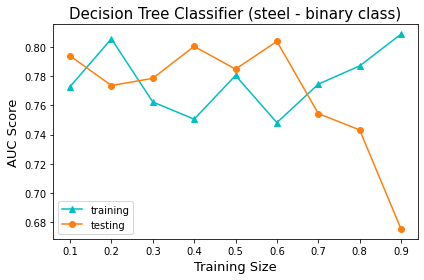

In [ ]:
# Get Features & Target variables
features_columns = steel_bin.columns[:-1] # exclude 'Class'
X = steel_bin[features_columns] # Features
y = steel_bin['Class'] # Target

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
DT_AUC_train = []
DT_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit DecisionTree 
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, scoring = 'roc_auc').mean()
  DT_AUC_train.append(train_scores)
  DT_AUC_test.append(test_scores)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Decision Tree Classifier (steel - binary class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

#### 1-2.2 Decision Tree (multi-class)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

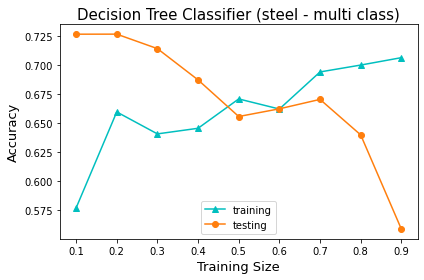

In [ ]:
# Get Features & Target variables
features_columns = steel_mul.columns[:-1] # exclude 'Class'
X = steel_mul[features_columns] # Features
y = steel_mul['multi_class'] # Target

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
DT_AUC_train = []
DT_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit DecisionTree 
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, scoring = 'accuracy').mean()
  DT_AUC_train.append(train_scores)
  DT_AUC_test.append(test_scores)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Decision Tree Classifier (steel - multi class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('Accuracy', size = 13)

#### 1-2.3 Multi-Layer Perceptrons (binary)     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

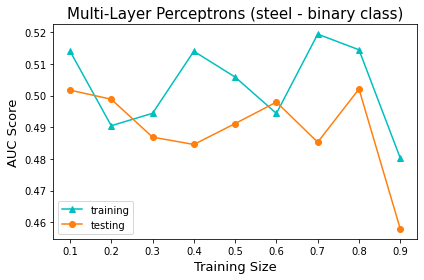

In [ ]:
# Get Features & Target variables
features_columns = steel_bin.columns[:-1] # exclude 'Class'
X = steel_bin[features_columns] # Features
y = steel_bin['Class'] # Target

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
MLP_AUC_train = []
MLP_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit Multi-Layer Perceptrons 
  clf = MLPClassifier(activation = 'logistic', 
                    solver = 'adam',
                    alpha = 1e-5,
                    max_iter = 1000,  
                    hidden_layer_sizes = (15, 10),
                    random_state = 1,
                    learning_rate_init = 0.5)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  MLP_AUC_train.append(train_scores)
  MLP_AUC_test.append(test_scores)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(training_sizes, MLP_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, MLP_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom left')
plt.title('Multi-Layer Perceptrons (steel - binary class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

#### 1-2.4 Multi-Layer Perceptrons (multi-class)     




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

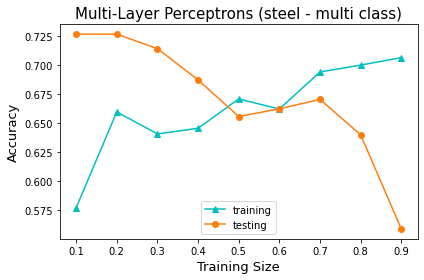

In [ ]:
# Get Features & Target variables
features_columns = steel_mul.columns[:-1] # exclude 'Class'
X = steel_mul[features_columns] # Features
y = steel_mul['multi_class'] # Target

training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
MLP_AUC_train = []
MLP_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit Multi-Layer Perceptrons 
  clf = MLPClassifier(activation = 'logistic', 
                    solver = 'adam',
                    alpha = 1e-5,
                    max_iter = 1000,  
                    hidden_layer_sizes = (15, 10),
                    random_state = 1,
                    learning_rate_init = 0.5)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'accuracy').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'accuracy').mean()
  MLP_AUC_train.append(train_scores)
  MLP_AUC_test.append(test_scores)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Multi-Layer Perceptrons (steel - multi class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('Accuracy', size = 13)

## 2) Can overfitting be overcome by feature selection?

### 2-1 ozone data (Feature Selection)

#### 2-1.1 Decision Tree

In [ ]:
features_columns = ozone.columns[:-1] # exclude 'Class'
X = ozone[features_columns] # Features
y = ozone['Class'] # Target

# feature selection - Univariate F-test Feature selection
X_new = SelectKBest(f_classif, k = 24).fit_transform(X, y)
print(X_new.shape)

(2534, 24)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

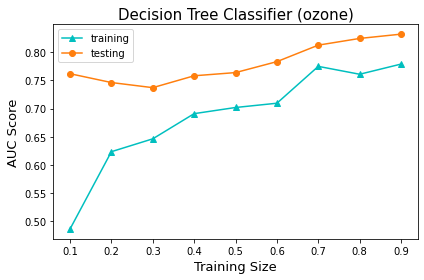

In [ ]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
DT_AUC_train = []
DT_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit DecisionTree 
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  DT_AUC_train.append(train_scores)
  DT_AUC_test.append(test_scores)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Decision Tree Classifier (ozone)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

#### 2-1.2 Multi-Layer Perceptrons

In [15]:
features_columns = ozone.columns[:-1] # exclude 'Class'
X = ozone[features_columns] # Features
y = ozone['Class'] # Target

# feature selection - Univariate F-test Feature selection
X_new = SelectKBest(f_classif, k = 32).fit_transform(X, y)
print(X_new.shape)

(2534, 32)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

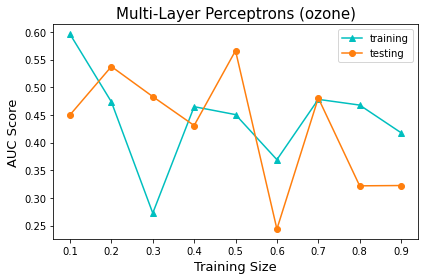

In [17]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
MLP_AUC_train = []
MLP_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit Multi-Layer Perceptrons 
  clf = MLPClassifier(activation = 'logistic', 
                    solver = 'adam',
                    alpha = 1e-5,
                    max_iter = 700,  
                    hidden_layer_sizes = (15, 10),
                    random_state = 1,
                    learning_rate_init = 0.5)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  MLP_AUC_train.append(train_scores)
  MLP_AUC_test.append(test_scores)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(training_sizes, MLP_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, MLP_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom left')
plt.title('Multi-Layer Perceptrons (ozone)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

### 2-2 steel plates data (Feature Selection)

#### 2-2.1 Decision Tree (binary)

In [ ]:
features_columns = steel_bin.columns[:-1] # exclude 'Class'
X = steel_bin[features_columns] # Features
y = steel_bin['Class'] # Target

# feature selection - Univariate F-test Feature selection
X_new = SelectKBest(f_classif, k = 13).fit_transform(X, y)
print(X_new.shape)

(1941, 13)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

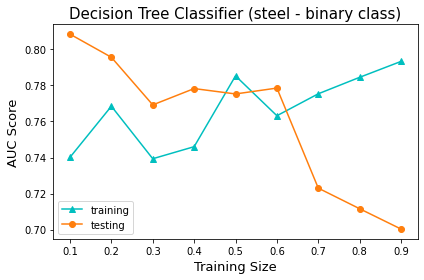

In [ ]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
DT_AUC_train = []
DT_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit DecisionTree 
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  DT_AUC_train.append(train_scores)
  DT_AUC_test.append(test_scores)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Decision Tree Classifier (steel - binary class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

#### 2-2.2 Decision Tree (multi-class)

In [ ]:
# Get Features & Target variables
features_columns = steel_mul.columns[:-1] # exclude 'Class'
X = steel_mul[features_columns] # Features
y = steel_mul['multi_class'] # Target

# feature selection - Univariate F-test Feature selection
X_new = SelectKBest(f_classif, k = 12).fit_transform(X, y)
print(X_new.shape)

(1941, 12)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

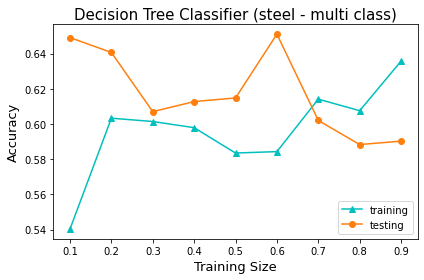

In [ ]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
DT_AUC_train = []
DT_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit DecisionTree 
  clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'accuracy').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'accuracy').mean()
  DT_AUC_train.append(train_scores)
  DT_AUC_test.append(test_scores)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Decision Tree Classifier (steel - multi class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('Accuracy', size = 13)

#### 2-2.3 Multi-Layer Perceptrons (binary)

In [ ]:
# Get Features & Target variables
features_columns = steel_bin.columns[:-1] # exclude 'Class'
X = steel_bin[features_columns] # Features
y = steel_bin['Class'] # Target

# feature selection - Univariate F-test Feature selection
X_new = SelectKBest(f_classif, k = 12).fit_transform(X, y)
print(X_new.shape)

(1941, 12)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

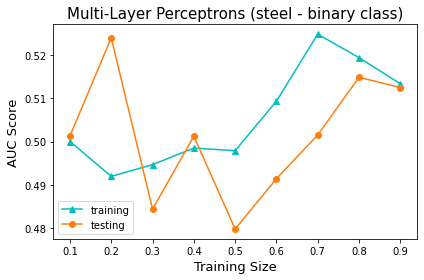

In [ ]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
MLP_AUC_train = []
MLP_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit Multi-Layer Perceptrons 
  clf = MLPClassifier(activation = 'logistic', 
                    solver = 'adam',
                    alpha = 1e-5,
                    max_iter = 1000,  
                    hidden_layer_sizes = (15, 10),
                    random_state = 1,
                    learning_rate_init = 0.5)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'roc_auc').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'roc_auc').mean()
  MLP_AUC_train.append(train_scores)
  MLP_AUC_test.append(test_scores)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(training_sizes, MLP_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, MLP_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom left')
plt.title('Multi-Layer Perceptrons (steel - binary class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('AUC Score', size = 13)

#### 2-2.4 Multi-Layer Perceptrons (multi-class)    

In [ ]:
# Get Features & Target variables
features_columns = steel_mul.columns[:-1] # exclude 'Class'
X = steel_mul[features_columns] # Features
y = steel_mul['multi_class'] # Target

# feature selection - Univariate F-test Feature selection
X_new = SelectKBest(f_classif, k = 10).fit_transform(X, y)
print(X_new.shape)

(1941, 10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

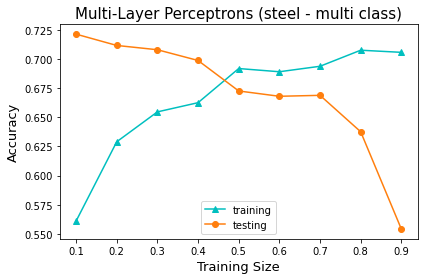

In [ ]:
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
MLP_AUC_train = []
MLP_AUC_test = []

for i in training_sizes:
  # looping through different training size
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = i,
                                                      random_state = 1)
  # fit Multi-Layer Perceptrons 
  clf = MLPClassifier(activation = 'logistic', 
                    solver = 'adam',
                    alpha = 1e-5,
                    max_iter = 1000,  
                    hidden_layer_sizes = (15, 10),
                    random_state = 1,
                    learning_rate_init = 0.5)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # calculate the mean of AUC score by 10-fold CV
  train_scores = cross_val_score(clf, X_train, y_train, cv = 10, 
                                 scoring = 'accuracy').mean()
  test_scores = cross_val_score(clf, X_test, y_test, cv = 10, 
                                scoring = 'accuracy').mean()
  MLP_AUC_train.append(train_scores)
  MLP_AUC_test.append(test_scores)

# plotting
plt.figure(figsize=(6, 4))
plt.plot(training_sizes, DT_AUC_train, 'c^-', label = 'training')
plt.plot(training_sizes, DT_AUC_test, 'C1o-', label = 'testing')
plt.legend(frameon = True, loc = 'bottom right')
plt.title('Multi-Layer Perceptrons (steel - multi class)', size = 15)
plt.xlabel('Training Size', size = 13)
plt.ylabel('Accuracy', size = 13)

## 3) Are either of your datasets imbalanced?  
- The ozone data is the most imbalance

In [ ]:
# view the frequency between binary classes steel plates data
print('binary steel: ')
print(steel_bin.Class.value_counts())
print(' - - - - - - - ')
# view the frequency between multiple classes steel plates data
print('multi-class steel: ')
print(steel_mul.multi_class.value_counts())
print(' - - - - - - - ')
# view the frequency between ozone data
print('ozone: ')
print(ozone.Class.value_counts()) 

binary steel: 
1    1268
2     673
Name: Class, dtype: int64
 - - - - - - - 
multi-class steel: 
7    673
6    402
3    391
2    190
1    158
4     72
5     55
Name: multi_class, dtype: int64
 - - - - - - - 
ozone: 
1    2374
2     160
Name: Class, dtype: int64


### 3-1 Do Nothing  
- The ROC AUC is 0.813.

In [20]:
features_columns = ozone.columns[:-1] # exclude 'Class'
X = ozone[features_columns] # Features
y = ozone['Class'] # Target

# feature selection - Univariate F-test Feature selection
X_new = SelectKBest(f_classif, k = 24).fit_transform(X, y)

# training size = 70%
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = 0.7,
                                                      random_state = 1)
# fit DecisionTree 
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 50)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


names = ['roc_auc', 'f1', 'precision', 'recall']
scores = []
for el in names:
  scores.append(cross_val_score(clf, X_test, y_test, cv = 10, 
                      scoring = el).mean())

#Specificity = tn / (fp + tn); Sensitivity = tp / (tp + fn)
# G-Mean = sqrt(Sensitivity * Specificity)
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
gmean = math.sqrt((tn / (fp + tn)) * (tp / (tp + fn)))

names.append('G-mean')
scores.append(gmean)

print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

output_table = pd.DataFrame([scores], columns = names)
output_table

confusion matrix:
[[684  29]
 [ 39   9]]


,roc_auc,f1,precision,recall,G-mean
0,0.813842,0.963642,0.942411,0.987363,0.473357


### 3-2 Random Oversampling  
- Random oversampling is known to increase the likelihood of occurring overfitting. On the other hand, the major drawback of Random undersampling is that this method can discard useful data.  
-  In order to create a synthetic instance, SMOTE finds the K-nearest neighbors of each minority instance, randomly selects one of them, and then calculate linear interpolations to produce a new minority instance in the neighborhood.  
- Running the example evaluates the model and reports the mean ROC AUC score across the multiple folds and repeats.  
- We can see a modest improvement in performance from a ROC AUC of about 0.81 to about 0.82.

In [31]:
# get a data
features_columns = ozone.columns[:-1]
X = ozone[features_columns]
y = ozone['Class'] 

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
names = ['roc_auc', 'f1', 'precision', 'recall']
scores = []
for el in names:
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores.append(cross_val_score(pipeline, X, y, cv = cv, n_jobs=-1, 
                                scoring = el).mean())

output_table = pd.DataFrame([scores], columns = names)
output_table

,roc_auc,f1,precision,recall
0,0.815236,0.171875,0.097442,0.7


### 3-3 Random Undersampling  
- Running the example evaluates the model with the pipeline of SMOTE oversampling and random undersampling on the training dataset.  
- In this case, we can see that the reported ROC AUC shows an additional lift to about 0.83.

In [32]:
# get a data
features_columns = ozone.columns[:-1]
X = ozone[features_columns]
y = ozone['Class'] 

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], 
                           flip_y=0, random_state=1)

# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
names = ['roc_auc', 'f1', 'precision', 'recall']
scores = []
for el in names:
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores.append(cross_val_score(pipeline, X, y, cv = cv, n_jobs=-1, 
                                scoring = el).mean())

output_table = pd.DataFrame([scores], columns = names)
output_table

,roc_auc,f1,precision,recall
0,0.83835,0.206534,0.118816,0.753333


### 3-4 SMOTE  
- Reference  
  https://www.kaggle.com/qianchao/smote-with-imbalance-data  
  https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [33]:
features_columns = ozone.columns[:-1] # exclude 'Class'
X = ozone[features_columns] # Features
y = ozone['Class'] # Target

# training size = 70%
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                      train_size = 0.7,
                                                      random_state = 1)

In [34]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train==2)))

SM = SMOTE(random_state=2)
X_train_res, y_train_res = SM.fit_sample(X_train, y_train.ravel())

print('After OverSampling, shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))

Before OverSampling, counts of label '1': 1661
Before OverSampling, counts of label '2': 112 

After OverSampling, shape of train_X: (3322, 24)
After OverSampling, shape of train_y: (3322,) 

After OverSampling, counts of label '1': 1661
After OverSampling, counts of label '2': 1661


In [35]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  18 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [36]:
clf.best_params_

{'C': 3.0}

In [37]:
lr1 = LogisticRegression(C=3,penalty='l2', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=5,
                   warm_start=False)

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 83.03571428571429%


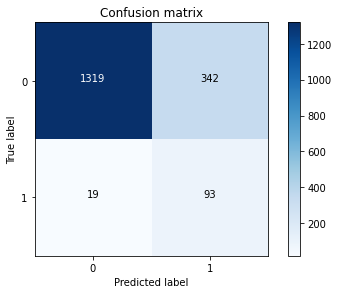

In [40]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 79.16666666666667%


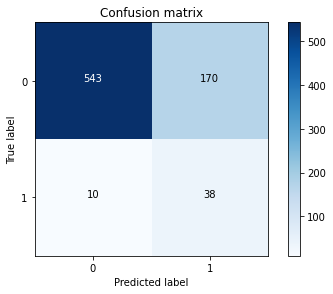

In [41]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [42]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


In [43]:
y_test = y_test.replace([1], 0)
y_test = y_test.replace([2], 1)
set(y_test)

{0, 1}

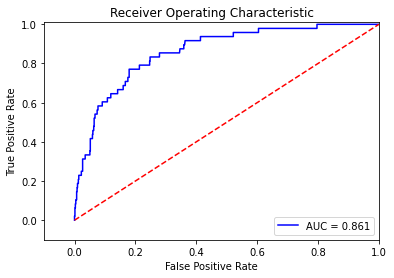

In [44]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 
# auc = 0.861

In [47]:
print('Confusion Matrix:')
print(cnf_matrix)

#Specificity = tn / (fp + tn); Sensitivity = tp / (tp + fn)
# G-Mean = sqrt(Sensitivity * Specificity)
[tp, fp], [fn, tn] = cnf_matrix
gmean = math.sqrt((tn / (fp + tn)) * (tp / (tp + fn)))
print('G-Mean:', gmean)
print('ROC-AUC:', roc_auc)

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = (precision + recall) * 0.5
print('Precision:', precision,)
print('Recall:', recall)
print('F1:', f1)


Confusion Matrix:
[[543 170]
 [ 10  38]]
G-Mean: 0.423542972229924
ROC-AUC: 0.8613546049555867
Precision: 0.761570827489481
Recall: 0.9819168173598554
F1: 0.8717438224246682
